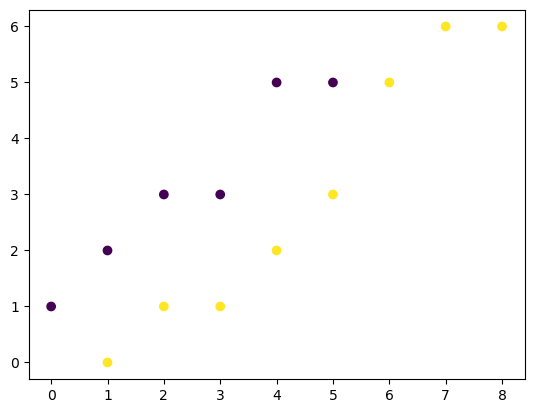

In [8]:
### Define the data structure for the input data
import numpy as np
import matplotlib.pyplot as plt
x = np.array([[0,1,2,3,4,5,1,2,3,4,5,6,7,8],[1,2,3,3,5,5,0,1,1,2,3,5,6,6]])
y=np.array([0,0,0,0,0,0,1,1,1,1,1,1,1,1])
x=x.T
# plot the data
plt.scatter(x[:,0],x[:,1],c=y)

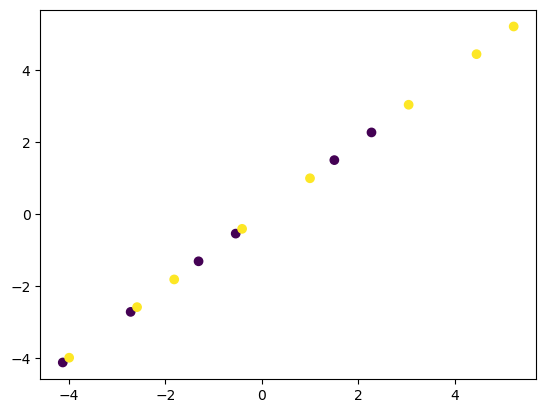

In [10]:
# perform PCA and look at the data
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_reduced = pca.fit_transform(x)
plt.scatter(x_reduced[:, 0],x_reduced[:,0],c=y)

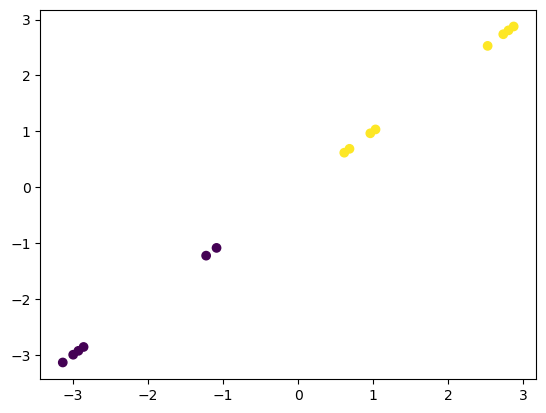

In [12]:
# you can see in the above plot is that PCA is not preserving the linear classification of the data
# we can use LDA to preserve the linear classification of the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
x_lda = lda.fit_transform(x,y)
plt.scatter(x_lda[:, 0],x_lda[:,0],c=y)

(178, 13)
(178,)


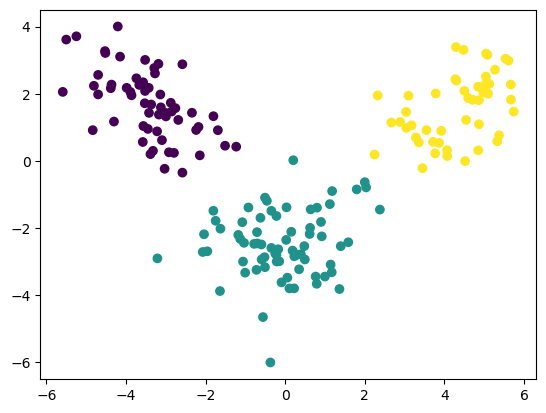

(178, 2)


In [17]:
# Now run the LDA on the wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.data.shape)
print(wine.target.shape)
lda = LinearDiscriminantAnalysis(n_components=2)
wine_lda = lda.fit_transform(wine.data,wine.target)
plt.scatter(wine_lda[:,0], wine_lda[:,1], c=wine.target)
plt.show()
print(wine_lda.shape)

In [53]:
# you can use LDA as a linear classifier also
# for that I will devivide the data into two parts one kfor training and one for testing
from sklearn.model_selection import train_test_split
# split 70% of the data for training and 30% for testing
xtrain, xtest, ytrain, ytest = train_test_split(wine.data,wine.target, test_size=0.3)
lda = LinearDiscriminantAnalysis()
lda.fit(xtrain,ytrain)
print(lda.score(xtest,ytest))
p = lda.predict(xtest)
print(ytest)
print(p)
print(ytest - p)

0.9814814814814815
[1 2 2 2 1 0 2 1 1 1 2 0 2 2 0 1 1 1 0 2 0 2 2 0 0 2 1 1 1 0 0 1 1 0 1 0 2
 1 2 1 1 2 2 1 1 1 1 2 1 0 1 0 1 0]
[1 2 2 2 1 0 2 1 1 1 2 0 2 2 0 1 1 1 0 2 0 2 2 0 0 2 1 1 1 0 0 1 2 0 1 0 2
 1 2 1 1 2 2 1 1 1 1 2 1 0 1 0 1 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]
